# ESTIMACIÓN DE PROBABILIDADES DE INCUMPLIMIENTO EN EL TIEMPO

La obtención de probabilidades de incumplimiento es una parte fundamental en la toma de decisiones en las instituciones de crédito. La probabilidad de incumplimiento se define en general como la probabilidad de que un acreditado no cumpla con las obligaciones de su crédito durante 90 días o más.

## 1. Objetivo:

Análisis de las Probabilidades de Incumplimiento de créditos hipotecarios de Estados Unidos para identificar periodos de crisis mediante el uso de las herramientas vistas en el curso de Análisis Numérico y Computo Científico.

## 2. Datos:

Se utilizará la información de 60 trimestres de 5000 créditos hipotecarios de Estados Unidos tomada de protafolios bursatilizado (RMBSs) a partir del año 2000 (hasta 2015). El proveedor de la base es el International Financial Reasearch (www.internationalfinancialreaserch.org), y se tiene acceso a ella por la adquisición del libro Deep Credit Risk de Daniel Rosch y Harald Scheule, que es la principal fuente de este trabajo.

## 3. Desarrollo:

### Importación de la librería

In [1]:
import IPython
import math
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
import pandas as pd
import pickle
import pydot
import pylab
import random
import scipy 
import scipy.cluster.hierarchy as shc
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import tabulate
import boto3
import io
import joblib
from io import StringIO
import os

from numpy import linalg
from pylab import *
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.integrate import *
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform 
from scipy.stats import *
from scipy.stats import binom, beta, expon, mvn, randint as sp_randint, shapiro, ttest_ind, bernoulli
from sklearn import metrics
from sklearn.calibration import calibration_curve
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, VotingClassifier, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor, VotingRegressor
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE, RFECV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix, r2_score, make_scorer, mean_squared_error, mean_absolute_error,roc_curve,accuracy_score,roc_auc_score,brier_score_loss, precision_score, recall_score,f1_score, log_loss
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import  KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen


/Users/eduardomorenoortiz/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/eduardomorenoortiz/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# Importar funciones de utils
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/utils")

from utils import woe, validation

### Lectura del archivo, decodificación  y conversión a dataframe

Lectura del archivo

In [3]:
df = pd.read_csv('../data/data_t_final.csv')

Visualización del archivo

In [4]:
df

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0          4    25         -2          25       119       NaN      61031.10   
1          4    26         -2          25       119       NaN      60882.42   
2          4    27         -2          25       119       NaN      60729.80   
3          4    28         -2          25       119       NaN      60576.14   
4          4    29         -2          25       119       NaN      60424.39   
...      ...   ...        ...         ...       ...       ...           ...   
62173  49972    52         25          52       145       NaN     180673.24   
62174  49972    53         25          52       145       NaN     179944.95   
62175  49972    54         25          52       145       NaN     179451.81   
62176  49972    55         25          52       145       NaN     178952.48   
62177  49972    56         25          52       145       NaN     178952.48   

         LTV_time  interest_rate_time  rate_time  ...  FICO_orig_time  \
0       33.911009              10.500       5.90  ...             587   
1       34.007232              10.500       5.90  ...             587   
2       34.335349              10.500       5.90  ...             587   
3       34.672545              10.875       5.90  ...             587   
4       34.951639              10.875       5.90  ...             587   
...           ...                 ...        ...  ...             ...   
62173  103.306966               7.500       5.15  ...             708   
62174   95.736862               7.500       5.15  ...             708   
62175   91.867079               7.500       5.15  ...             708   
62176   91.560581               7.500       5.15  ...             708   
62177   90.874242               7.500       5.15  ...             708   

       LTV_orig_time  Interest_Rate_orig_time  state_orig_time  hpi_orig_time  \
0               81.8                     10.5               KY          97.99   
1               81.8                     10.5               KY          97.99   
2               81.8                     10.5               KY          97.99   
3               81.8                     10.5               KY          97.99   
4               81.8                     10.5               KY          97.99   
...              ...                      ...              ...            ...   
62173           79.8                      7.5               AL         226.29   
62174           79.8                      7.5               AL         226.29   
62175           79.8                      7.5               AL         226.29   
62176           79.8                      7.5               AL         226.29   
62177           79.8                      7.5               AL         226.29   

       default_time  payoff_time  status_time  lgd_time  recovery_res  
0                 0            0            0       NaN           NaN  
1                 0            0            0       NaN           NaN  
2                 0            0            0       NaN           NaN  
3                 0            0            0       NaN           NaN  
4                 0            0            0       NaN           NaN  
...             ...          ...          ...       ...           ...  
62173             0            0            0       NaN           NaN  
62174             0            0            0       NaN           NaN  
62175             0            0            0       NaN           NaN  
62176             0            0            0       NaN           NaN  
62177             1            0            1       0.0     178952.48  

[62178 rows x 28 columns]

### Limpieza de la base de datos

Quitamos renglones con datos 

In [5]:
data = df.dropna(subset=['time', 'default_time','LTV_time', 'FICO_orig_time']).copy()

### Data Engineering (falta la selección de las mejores variables, lo tenemos pendiente)

Impresión del nombre de las columnas

In [6]:
for col in data.columns: 
    print(col) 

id
time
orig_time
first_time
mat_time
res_time
balance_time
LTV_time
interest_rate_time
rate_time
hpi_time
gdp_time
uer_time
REtype_CO_orig_time
REtype_PU_orig_time
REtype_SF_orig_time
investor_orig_time
balance_orig_time
FICO_orig_time
LTV_orig_time
Interest_Rate_orig_time
state_orig_time
hpi_orig_time
default_time
payoff_time
status_time
lgd_time
recovery_res


### Modelo

La variable dependiente del modelo de regresión logística es "default-time" que da información relacionada con el incumplimiento de pago en cada período de tiempo. Es una variable binomial con valores 0 o 1.

Se presenta un modelo que incluye todas las variables, una vez realizada la ingeniería de datos se realizará con las variables que más aportación tengan sobre la varianza total de la variable dependiente. Asimismo, fata decidir respecto a si se evaluará el modelo contra un conjunto de prueba.

La regresión se realiza utilizando una función para modelo lineales generalizados, que admiten varios tipos de familias. Para este ejercicio se tomó un binomial.

In [7]:
model_lr = smf.glm('default_time ~ balance_time + LTV_time + interest_rate_time + rate_time + hpi_time + gdp_time + uer_time + REtype_CO_orig_time + REtype_PU_orig_time + REtype_SF_orig_time + investor_orig_time + balance_orig_time + FICO_orig_time + LTV_orig_time + Interest_Rate_orig_time + hpi_orig_time', family = sm.families.Binomial(), data = data).fit()

Con relación a los p_values podemos observar que la mayoría de la variables son significativas. Entre las variables más significativas que tienen un impacto positivo sobre el incumplimiento de pago tenemos:
* balance_time.- saldo en el periodo de observación
* interest_rate_time.- tasa de interés en el periodo de observación
* LTV_orig_time.- Loan to Value en el momento de la originación
* hpi_orig_time.- índice de precios de casa en el momento de la originación

Las únicas dos variables que podríamos considerar no significativas son "REtype_CO_orig_time" y "REtype_SF_orig_time, ambas con coeficientes positivos y muy bajos. Estas varaibles son identificadoras del tipo de vivienda.

In [8]:
print(model_lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           default_time   No. Observations:                62153
Model:                            GLM   Df Residuals:                    62136
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6645.7
Date:                Sat, 05 Dec 2020   Deviance:                       13291.
Time:                        21:30:36   Pearson chi2:                 5.75e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [9]:
PD_logit_model = pd.DataFrame(model_lr.fittedvalues, columns=['PD_logit_model'])

In [10]:
data2 = pd.merge(df[['default_time','time']],PD_logit_model, right_index=True, left_index=True)

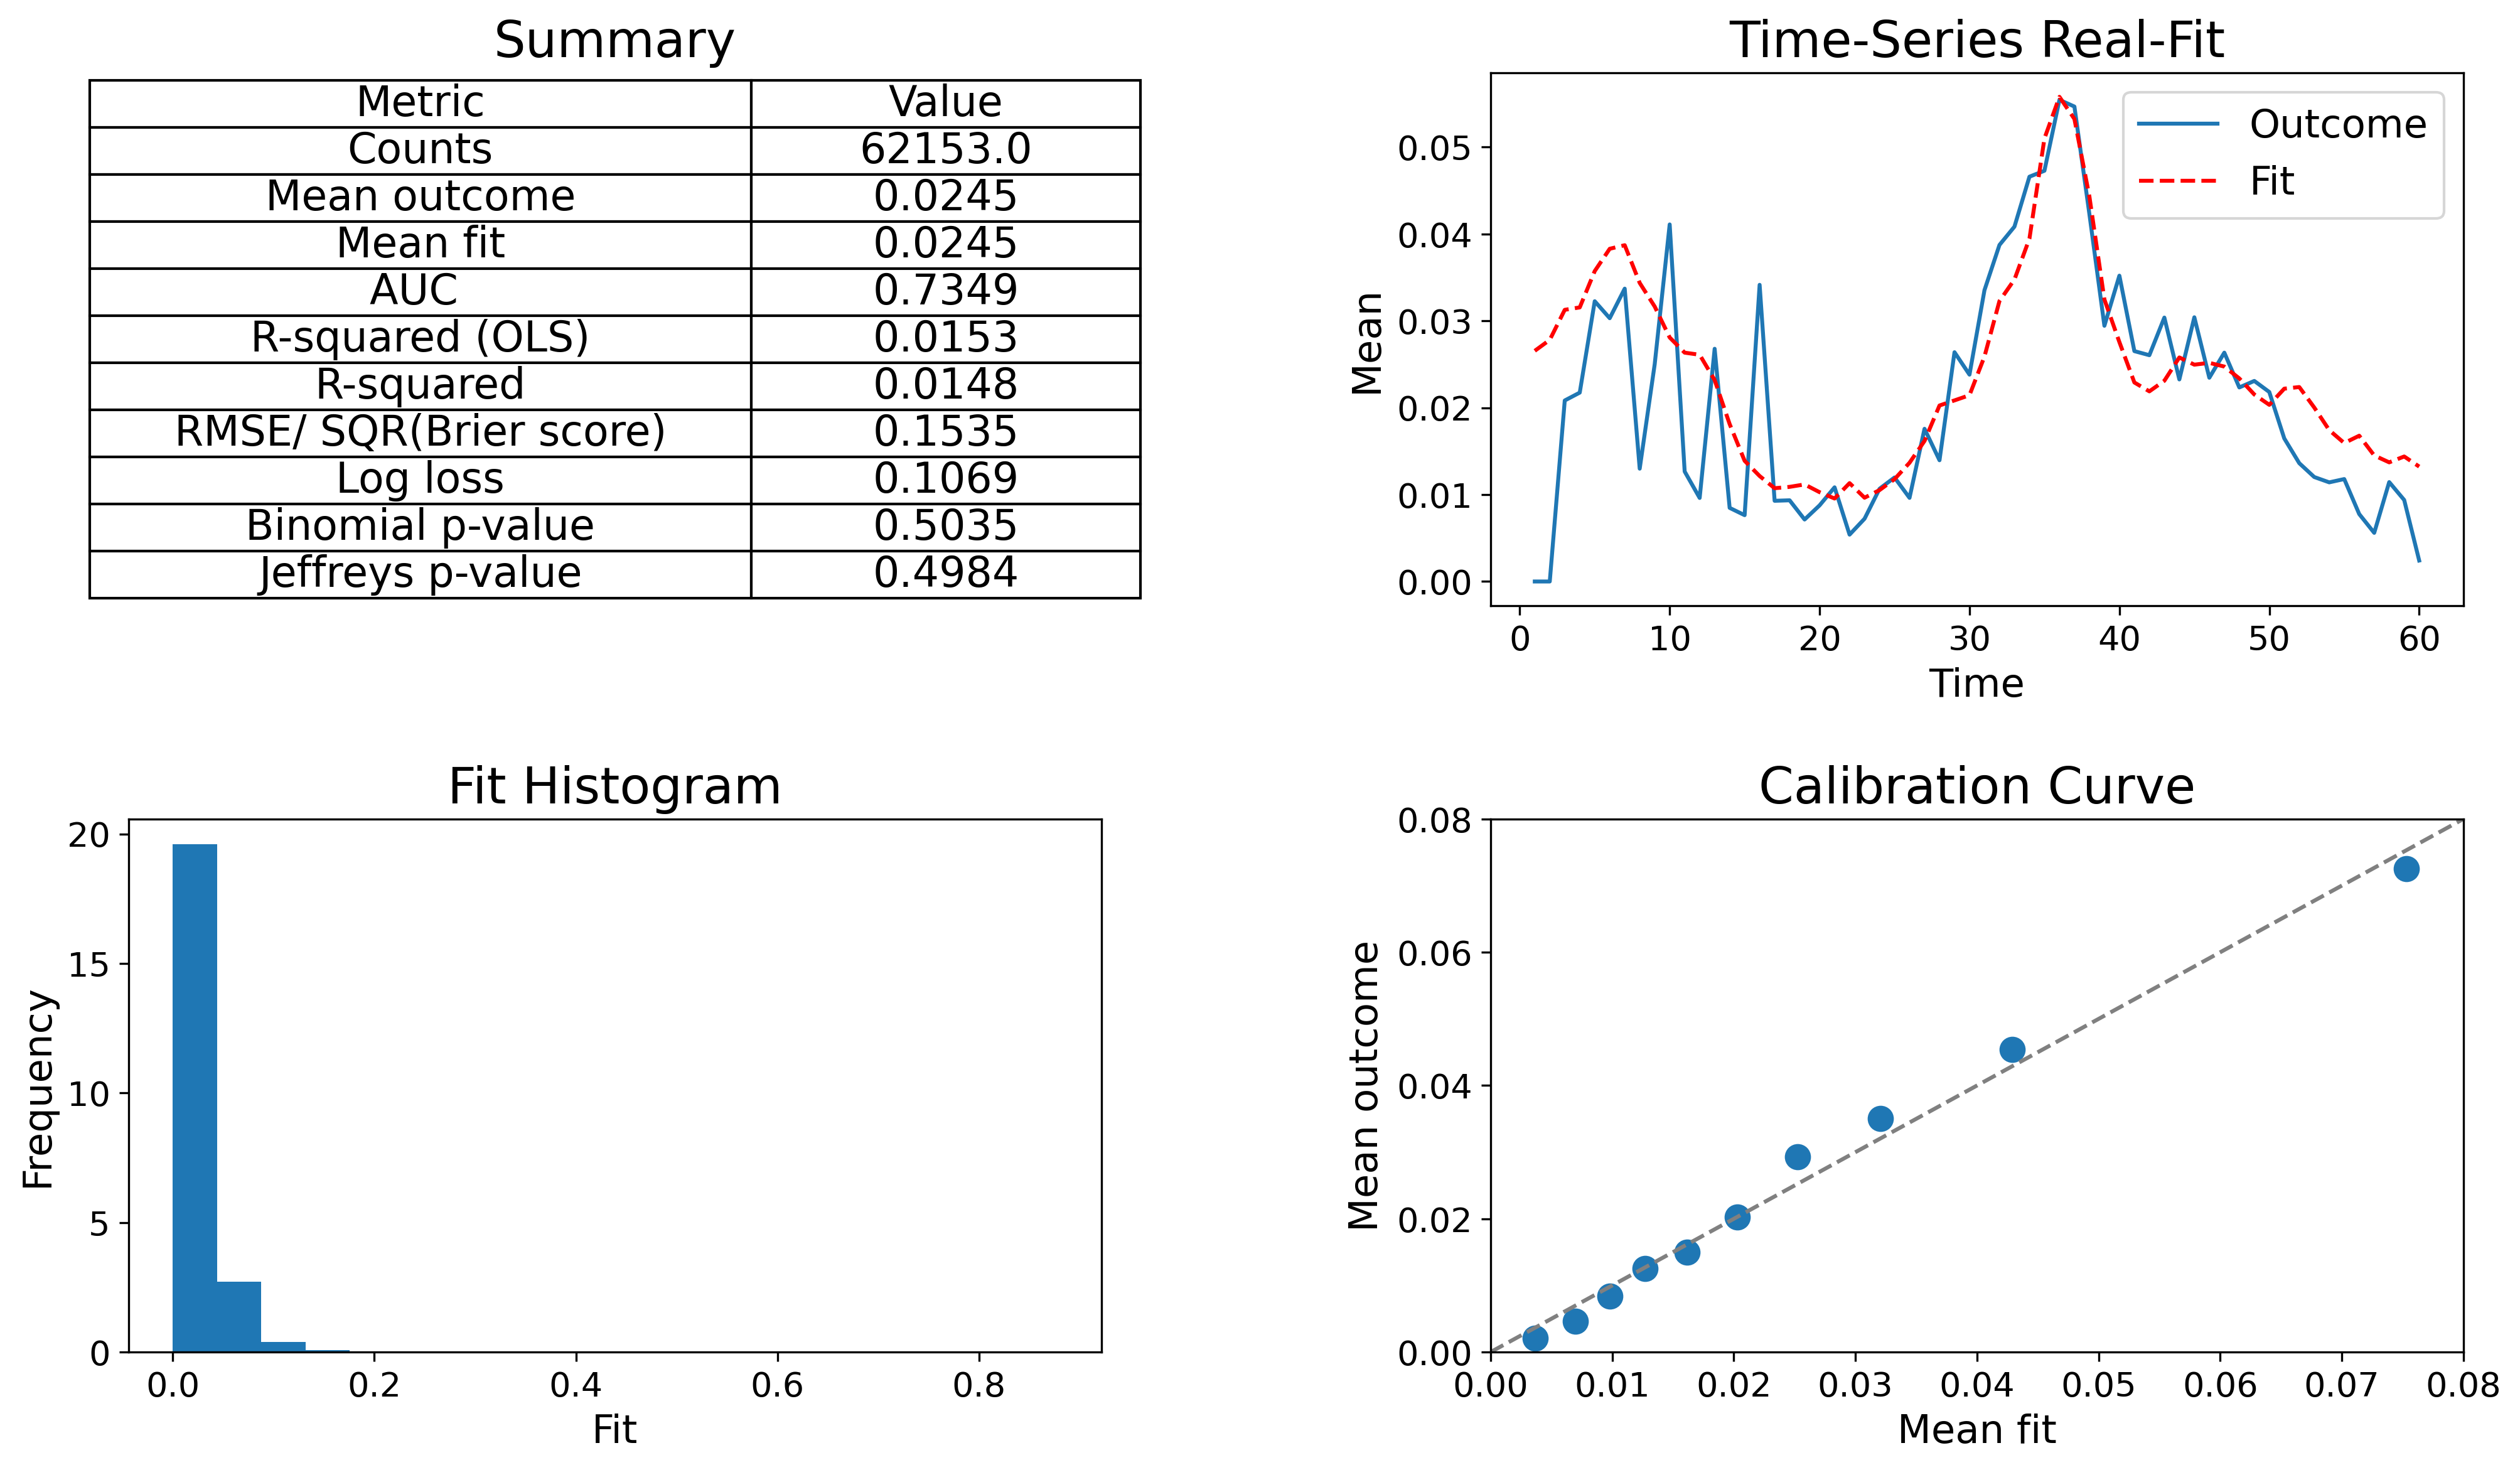

In [11]:
# Corremos la función
# Hacemos conclusiones
# Nótese las PDs elevadas en el periodo de crisis
validation(data2.PD_logit_model, data2.default_time, data2.time)

In [12]:
# Para ejemplificar la reduccion de dimensionalidad se usará la varieble state_orig_time 
print(data['state_orig_time'].value_counts())

CA    12582
FL     6175
TX     3893
NY     2947
GA     2649
IL     2350
AZ     2171
VA     2070
OH     1726
PA     1714
MI     1615
MD     1591
NV     1572
WA     1562
NJ     1510
CO     1499
NC     1397
MA     1042
OR      963
IN      923
MO      836
CT      788
MN      781
LA      755
AL      701
TN      700
SC      638
PR      414
MS      370
AR      364
WI      342
UT      340
HI      325
NM      290
KY      286
NH      285
OK      283
KS      255
IA      157
ID      157
DC      156
ME      119
DE      110
RI       93
NE       67
WV       54
WY       51
VT       40
MT       36
AK       24
SD       20
ND       15
Name: state_orig_time, dtype: int64


In [13]:
# Una forma de tomar la variable es haciendo una dummy para cada variable, pero eso haría que tengamos más de 100 varibles
# Por lo tanto reducimos dimensionalidad con PCA()


In [14]:
#Calcculamos las tasas de default
scaler = StandardScaler()
defaultrates_states1 = data.groupby(['time', 'state_orig_time'])['default_time'].mean().unstack(level=1).add_prefix('default_rate').fillna(0)
defaultrates_states = scaler.fit_transform(defaultrates_states1)

<function matplotlib.pyplot.show(close=None, block=None)>

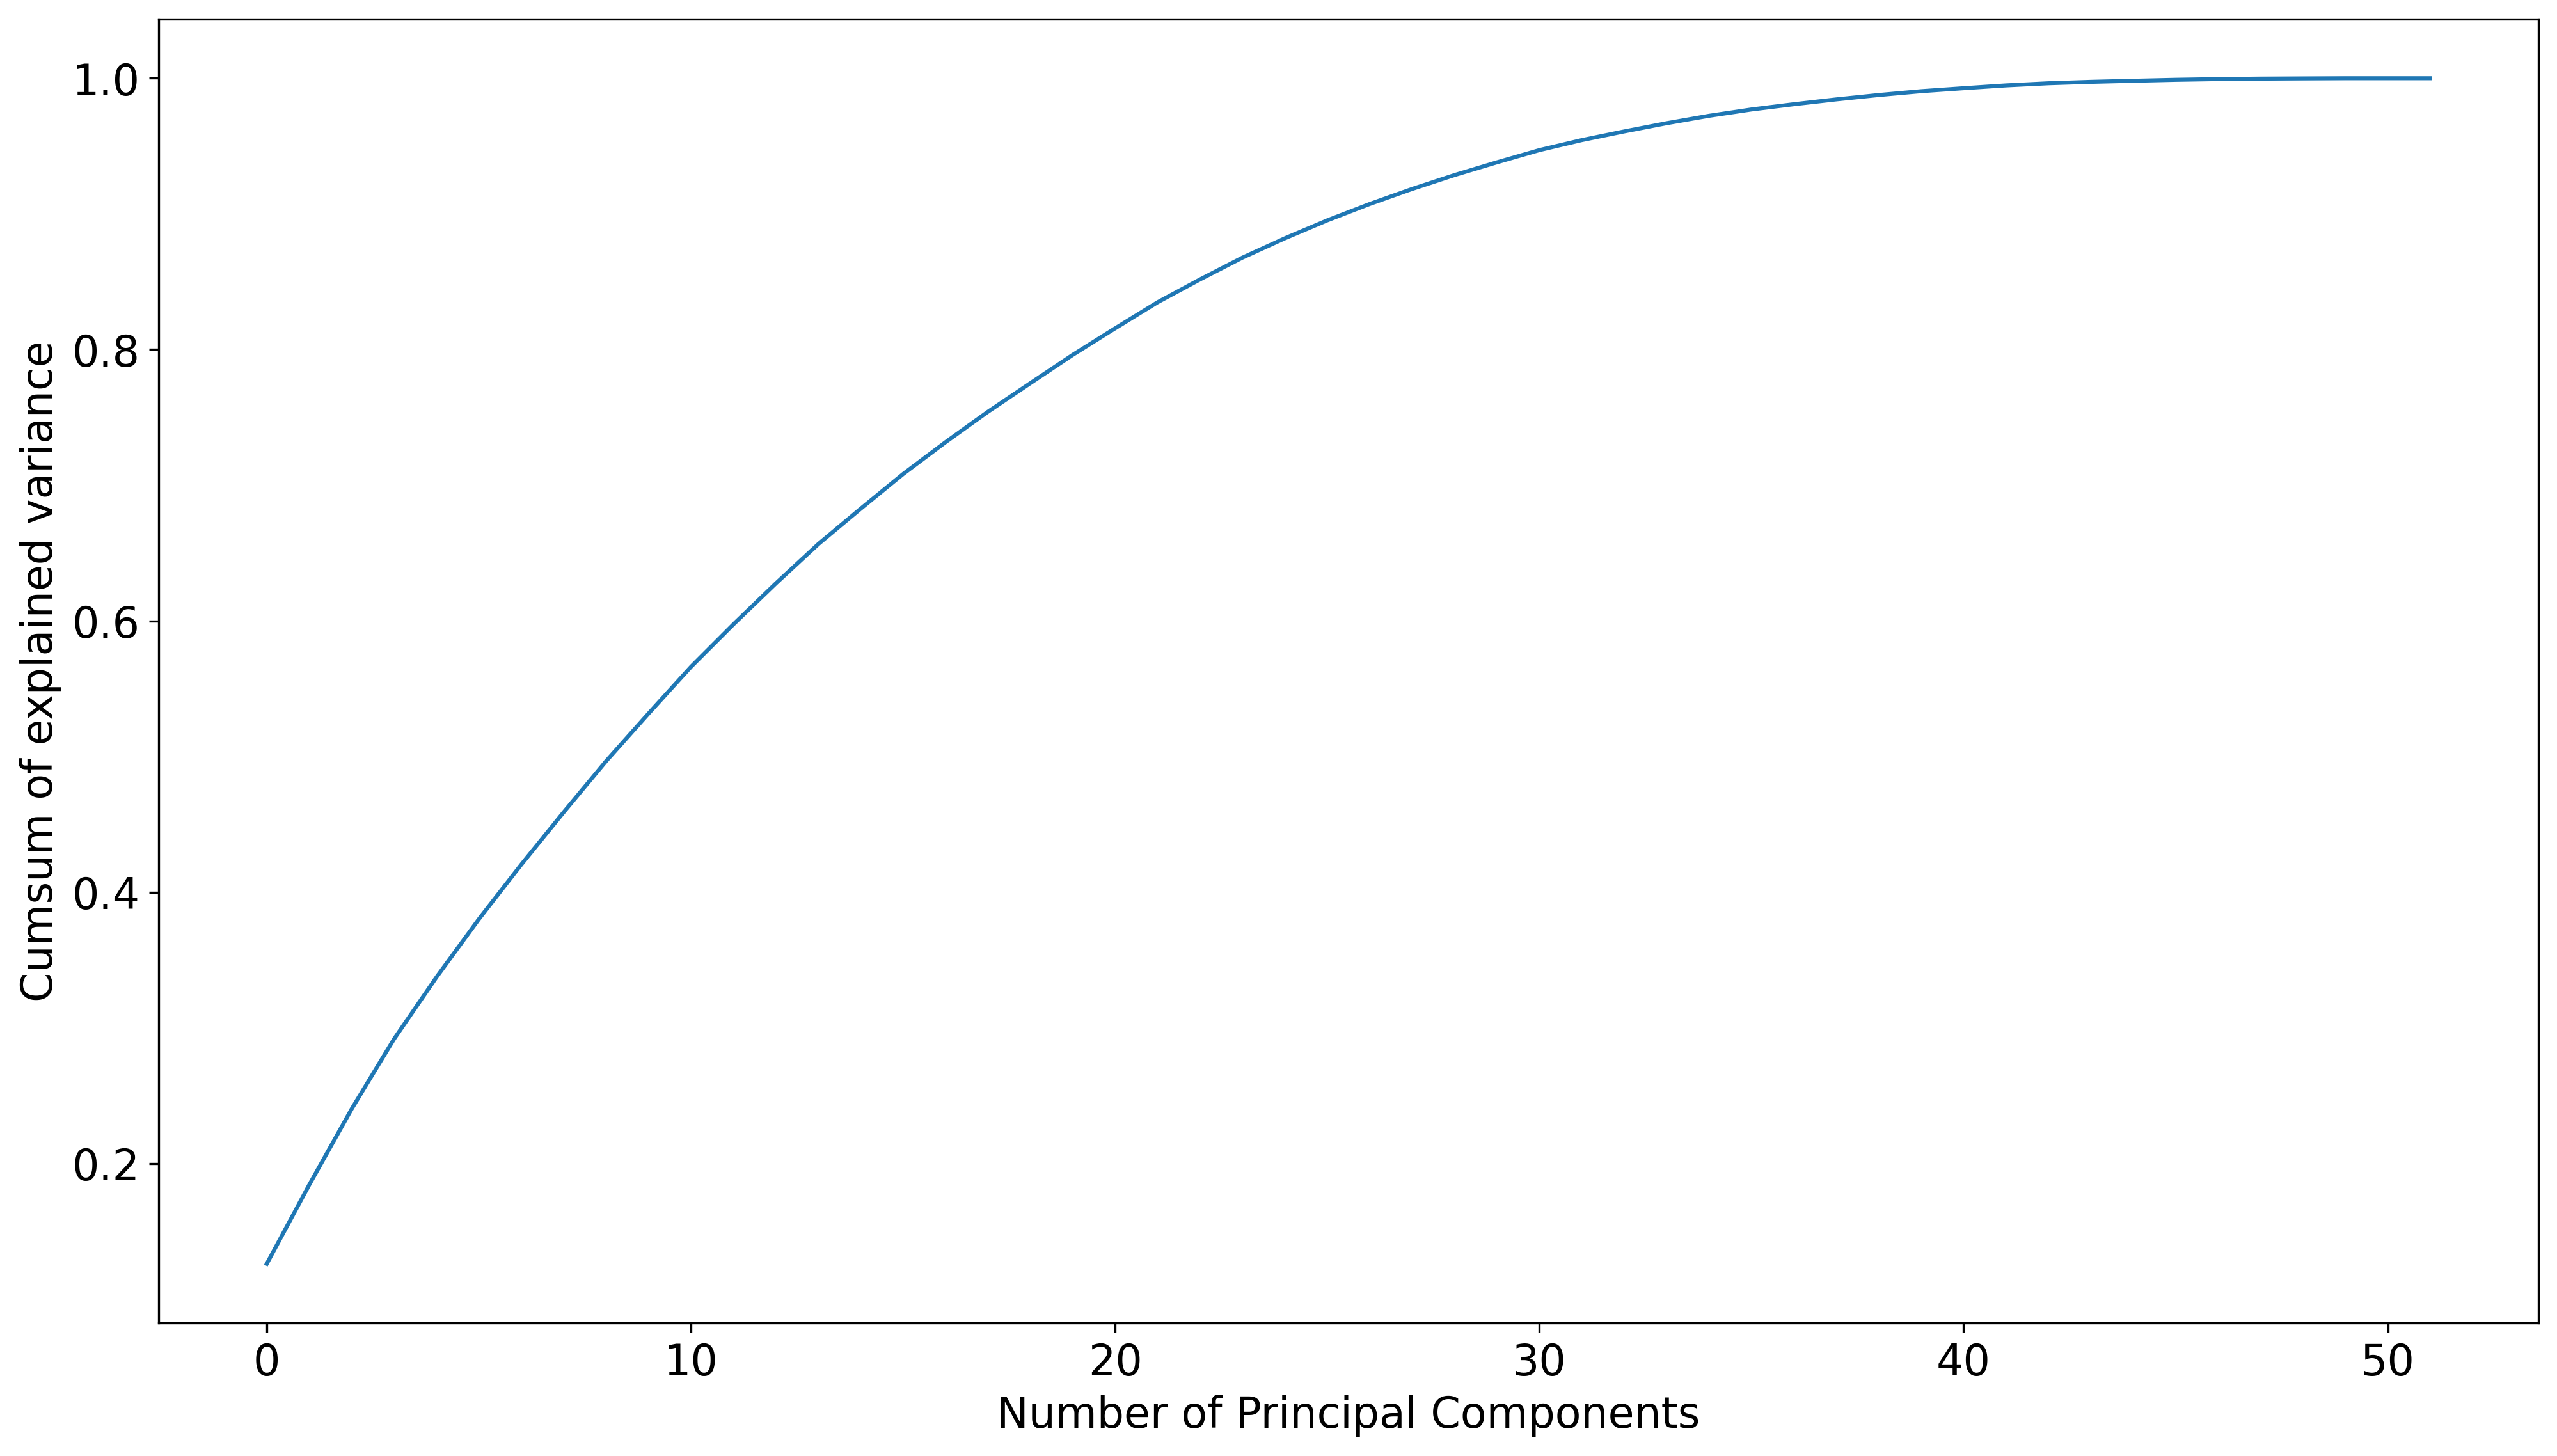

In [17]:
# Aplicamos PCA
pca = PCA()
pca.fit(defaultrates_states)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumsum of explained variance')
plt.show

ValueError: x and y must have same first dimension, but have shapes (60,) and (0, 52)

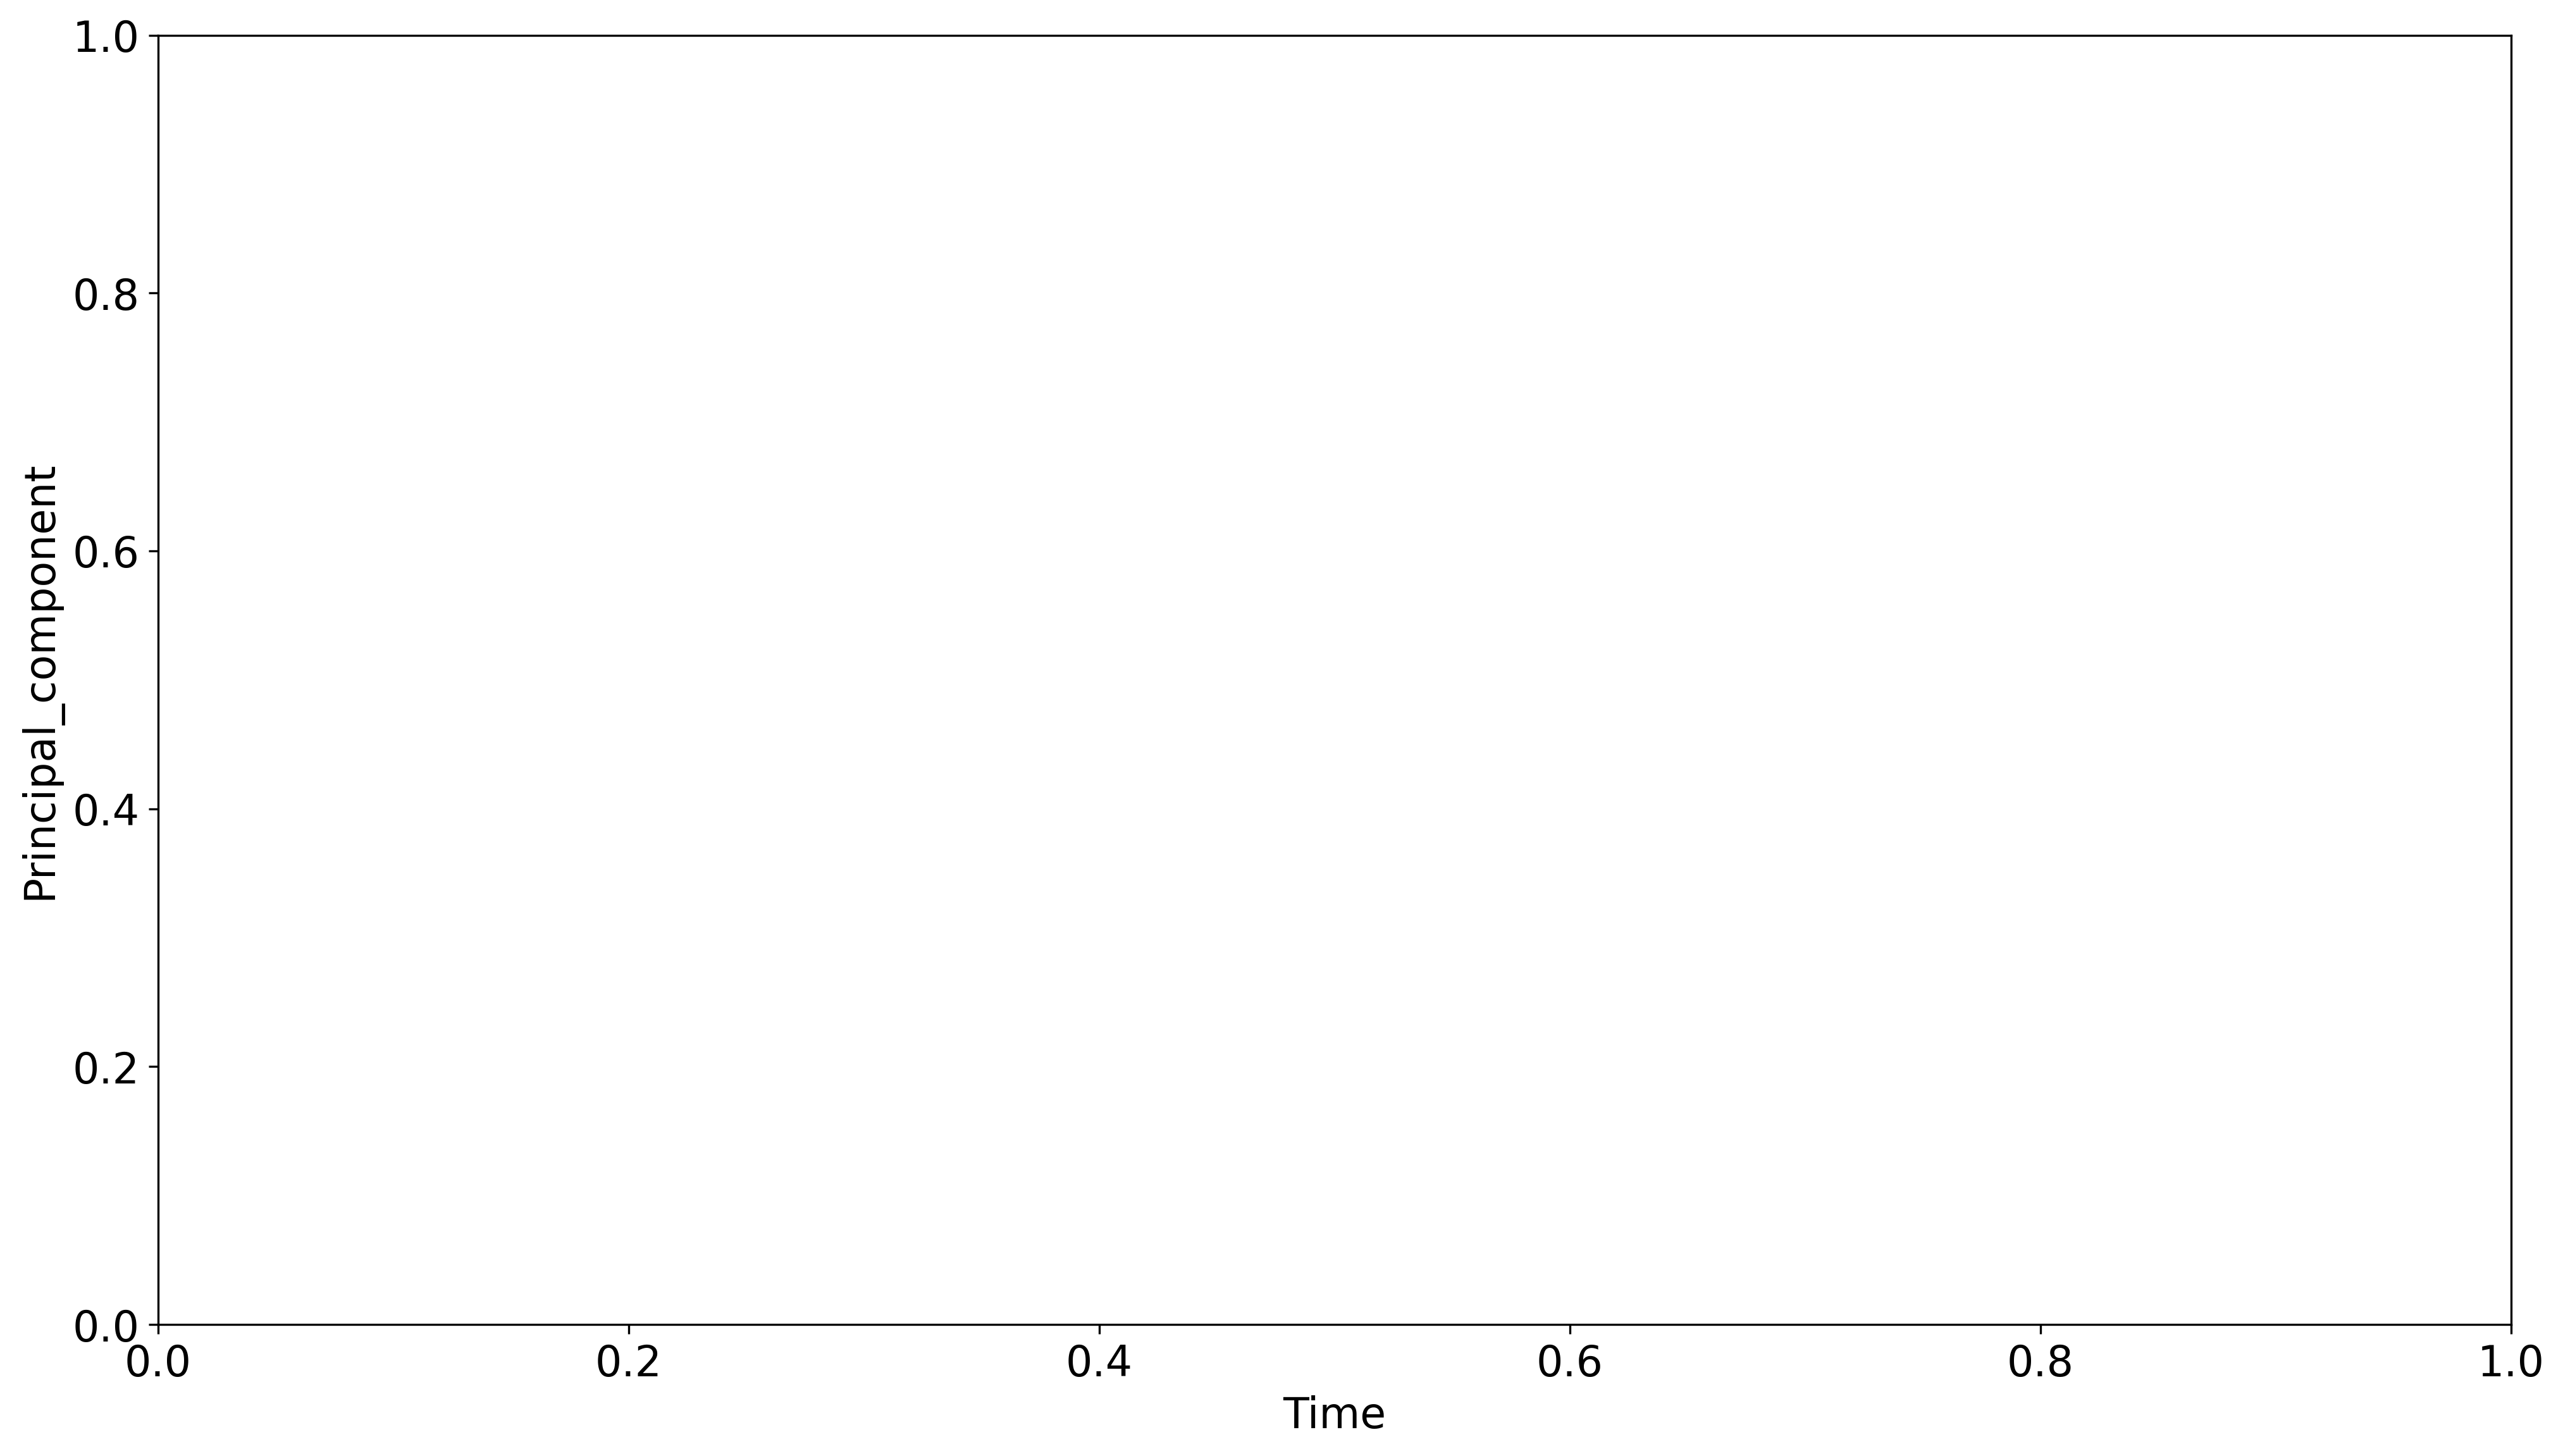

In [18]:
# Graficamos 2 compnentes principales

Z = pca.transform(defaultrates_states)

plt.xlabel('Time')
plt.ylabel('Principal_component')
plt.plot(defaultrates_states1.index, Z[:0], alpha=1, label="First PC")
plt.plot(defaultrates_states1.index, Z[:1], alpha=1, color = 'red', linestyle='dashed',label="Second PC")
plt.legend(loc='best')
plt.show

In [19]:
Z

array([[-2.52593756e+00,  4.51746445e-04, -2.83014144e-01, ...,
         2.39638311e-02, -1.88040546e-17,  9.85801579e-17],
       [-2.52593756e+00,  4.51746445e-04, -2.83014144e-01, ...,
         2.39638311e-02, -1.88040546e-17,  9.85801579e-17],
       [-2.30016112e+00,  1.12072097e+00,  2.78096747e-01, ...,
        -3.91622790e-02,  3.39093383e-16, -2.41219788e-16],
       ...,
       [-4.65789117e-01, -5.62646115e-01, -5.17698701e-01, ...,
        -6.46033155e-02,  2.40552426e-16,  1.66357865e-16],
       [-1.06567752e+00, -4.20925644e-01,  1.28479063e+00, ...,
         6.90355472e-03, -1.43312109e-16, -1.71319600e-16],
       [-2.62645475e+00,  8.83985485e-02, -5.07129115e-01, ...,
         1.04960524e-01, -6.31834888e-16,  2.59243924e-16]])